# Data Analysis in Geoscience Remote Sensing Projects: Exercises
## Final task handed in by: Marcella Deny, on 12th April, 2024
Hendrik Andersen, contact: hendrik.andersen@kit.edu

## Part one: Regression and sensitivity estimation with remote sensing data

For this part you are provided with a data set contained in the file 'data_final_task_regression.csv'. The data contains information on regional averages of low-cloud occurrence and meteorological factors in the Southeast Atlantic (10°S-20°S, 0°E-10°E - this means that the study area is about 1000 km x 1000 km large). The DataFrame contains the following variables:
- sst: sea surface temperature
- eis: estimated inversion strength
- t_adv: temperature advection
- w700: vertical pressure velocity at 700 hPa (this is the vertical wind speed, given in Pa/s: positive numbers mean subsiding air masses)
- rhft: relative humidity in the free troposphere (free troposphere is above the cloud layer)
- clf: Liquid water cloud fraction

The data on clouds are from a satellite data set from the MODIS sensor on board NASA's Terra satellite. The product name is MOD08_M3, downloaded from https://ladsweb.modaps.eosdis.nasa.gov/ for more information check out https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/MOD08_M3/#overview

The meteorological data are ERA5 reanalysis data on meteorological factors thought to be important for low cloud cover. The data is downloaded from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

For more information on how reanalysis data are generated, check out the 2-minute video from Copernicus ECMWF here: https://www.youtube.com/watch?v=FAGobvUGl24

Your task is to analyze the data to
1. quantitatively and visually describe the data 
2. analyze relationships between cloud fraction and the cloud-controlling factors using
    - regression analysis
    - a machine learning model (e.g. feature importance, SHAP)
3. describe the results of your analyses in the provided markdown cells. Are your results in agreement with the described relationships in the following study?: Klein et al. (2017): Low-Cloud Feedbacks from Cloud-Controlling Factors: A Review, Surveys in Geophysics, doi: 10.1007/s10712-017-9433-3

## Part two: Classification in a remote sensing retrieval setting

For the second part of the exercise, you are tasked to develop a machine learning method to detect fog and low clouds for a location in the Namib Desert on the basis of observations from a geostationary satellite platform. You are provided a data set (ILIAS: 'data_final_task_classification.csv') of night-time satellite observations at different wave lengths over a meteorological measurement station. The geostationary satellite (Spinning Enhanced Visible and Infrared Imager; SEVIRI) makes a scan every 15 minutes at a spatial resolution of 3km x 3km. For the exact time steps of the satellite observations made available here, a boolean (True/False) data set on the presence of fog and low clouds from the measurement station is provided, which should be used as the labeled target data.
- IR_016: Measurements at the 1.6 µm channel
- IR_039: Measurements at the 3.9 µm channel
- IR_087: Measurements at the 8.7 µm channel
- IR_097: Measurements at the 9.7 µm channel
- IR_108: Measurements at the 10.8 µm channel
- IR_120: Measurements at the 12.0 µm channel
- IR_134: Measurements at the 13.4 µm channel
- station_fls: A boolean (True/False) information if fog or low clouds are present at the given time

Your task is to analyze the data to
1. Train and optimize a machine learning classifier (e.g. GradientBoostingClassifier) to detect fog and low clouds and analyze the results using a confusion matrix and using performance metrics
2. Compare the results to a logistic regression approach, and discuss  in the provided markdown cell which method is better at classifying fog and low cloud presence/absence
3. Compare the results to a dedicated detection approach developed for the region in Andersen and Cermak (2018): First fully diurnal fog and low cloud satellite detection reveals life cycle in the Namib, Atmospheric Measurement Techniques, doi: 10.5194/amt-11-5461-2018. Use the provided markdown cell for the discussion.

You can find more specific tasks in the cells below


## Part one: Regression and sensitivity estimation with remote sensing data
__Task__: 
In a typical scientific workflow, the first step is to get an overview of the data. Typically, visualizations and descriptive statistics are very useful to achieve this.  
1. Calculate the mean and standard deviation of cloud fraction and plot the distribution of cloud fraction in a histogram.
2. Plot the CLF time series and describe seasonal patterns.

Mean cloud fraction: 0.6522455561224002
Standard deviation of the cloud fraction: 0.15539470716409962


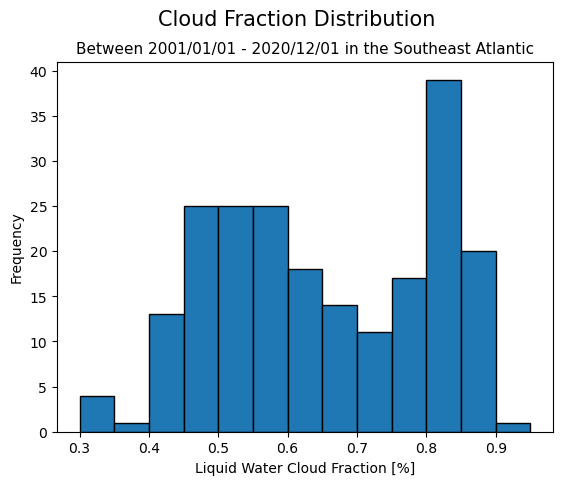

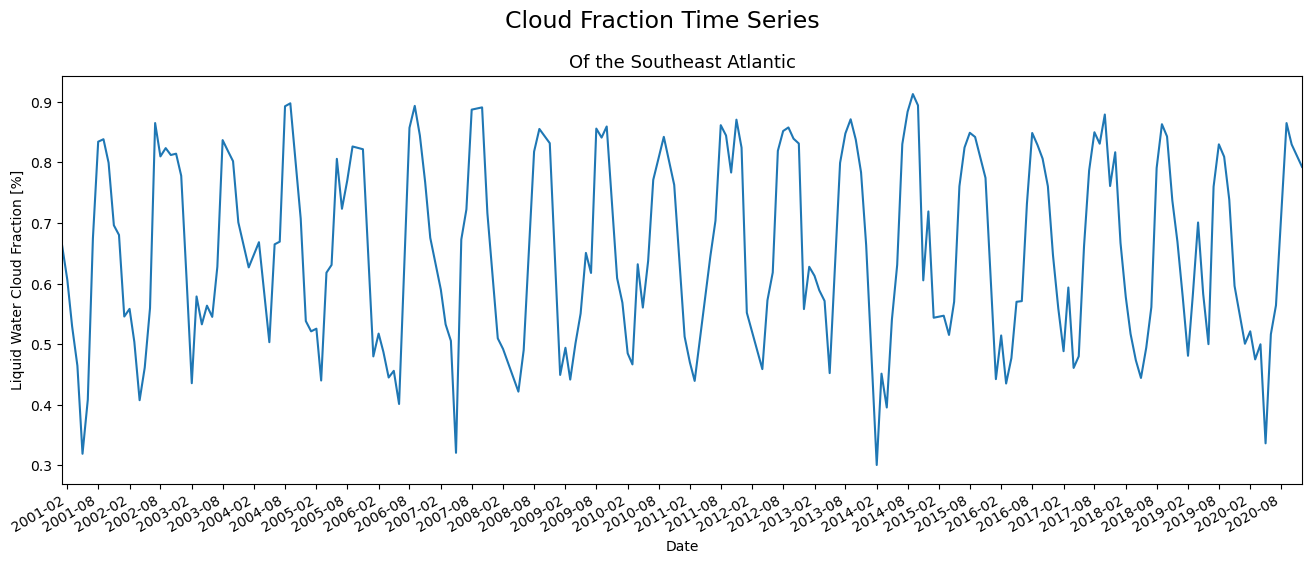

In [1]:
# use this cell for your code, make sure to comment your code to make it understandable
# just to get you started:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_df = pd.read_csv("data_final_task_regression.csv", index_col='time', parse_dates=True)
data_df.head()


# load additional packages 
import matplotlib.dates as mdates
from matplotlib.pyplot import figure


# Task 1
## calculate mean and standard deviation of cloud fraction (clf)
mean_clf = data_df['clf'].mean() # mean
sd_clf = data_df['clf'].std() # standard deviation
print("Mean cloud fraction:", mean_clf)
print("Standard deviation of the cloud fraction:", sd_clf)

## histogram of the distribution of cloud fraction
plt.hist(data_df.clf, edgecolor = "black", bins = 13, range = (0.3, 0.95)) # define histogram including bins and range 
plt.title('Between 2001/01/01 - 2020/12/01 in the Southeast Atlantic',fontsize = 11) # add subtitle 
plt.suptitle('Cloud Fraction Distribution', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Liquid Water Cloud Fraction [%]") # add x axis label
plt.ylabel("Frequency") # add y axis label


# Task 2
## Plot the CLF time series and describe seasonal patterns.
plt.figure(figsize=(16, 6)) # change figure size

ax = data_df.clf.plot()
plt.title('Of the Southeast Atlantic',fontsize = 13) # add subtitle 
plt.suptitle('Cloud Fraction Time Series', fontsize = 17 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Date") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6)) # change tick frequency
plt.xlim(["2001-01-01", "2020-12-01"]) # define x axis limits 
plt.show()

Describe the results here:

The mean cloud fraction (clf) amounts to **0.65 %** and the standard deviation to **0.16 %**. The histogram shows that the clf is always between 0.3 % - 0.95 %. It further displays two local maxima, at a frequency of 25 between **0.45 - 0.6 %** (including 3 bins) and at a frequency of 38 between **0.8 - 0.85 %** cloud fraction. 

The CLF time series displays a clear seasonal cycle: It reaches a **minimum in late winter or early spring** and a **maximum during summer and fall**. The peaks are a little wider than the lows, therefore the months with high clf exceed the ones with lower clf. 

__Task__: 
1. Compute a regression analysis of CLF with each meteorological predictor
2. Describe the sensitivities of CLF to the meteorological predictors:
    - How sensitive are low clouds to changes in meteorological predictors (in individual simple regression models, and in a multiple regression framework)?
    - Are the relationships significant?
    - Are there strong correlations between the different predictors that could influence the sensitivity estimates?
  
For the multiple linear regression, you want to be able to compare the sensitivity estimates of the different predictors (to see which ones are most important). To do this, the predictors need to be on the same scale. This is done in the code cell below by using the standard scaler (it subtracts the mean and divides by a standard deviation, so that all predictors in X have a mean value of 0 and unit variance).

In [2]:
from sklearn.preprocessing import StandardScaler

X = data_df.drop(['clf'],axis=1)
y = data_df.clf

X_standardized = StandardScaler().fit(X).transform(X)

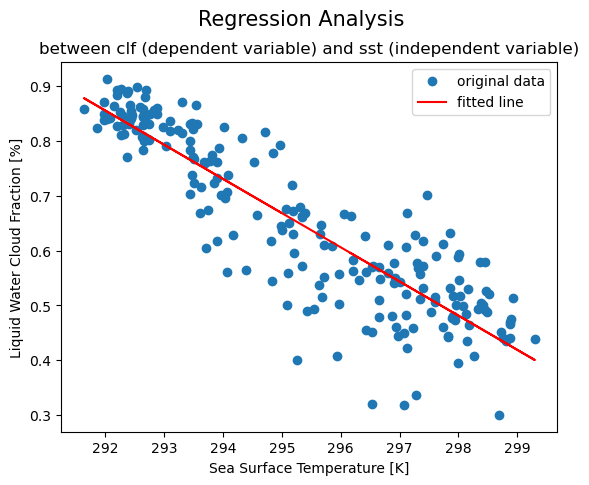

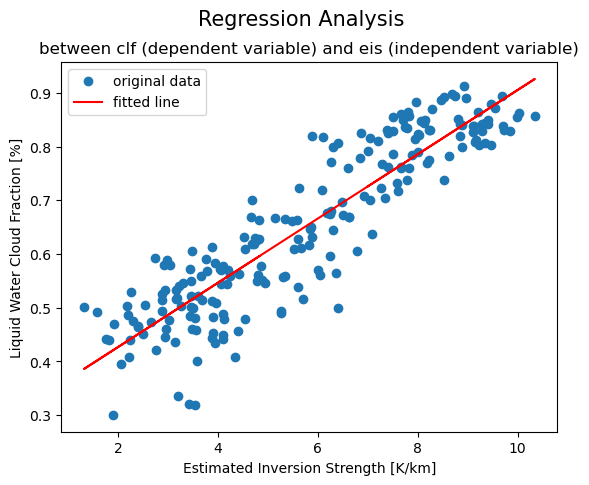

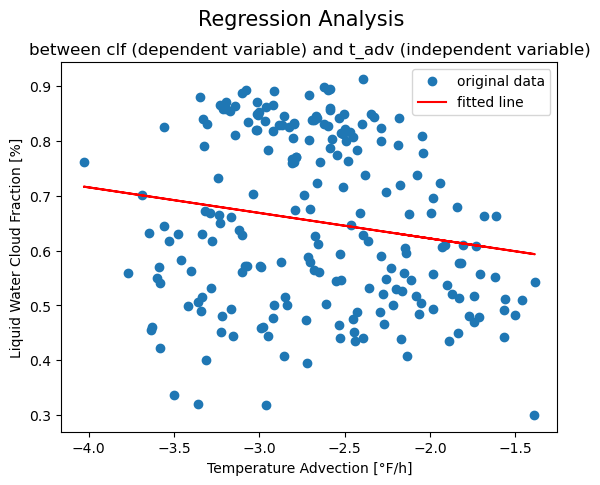

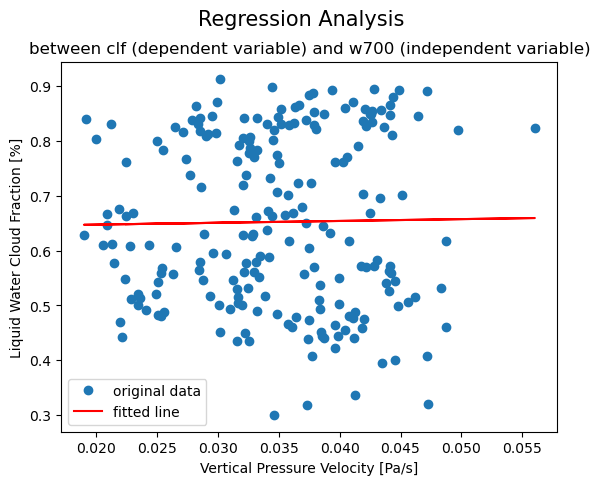

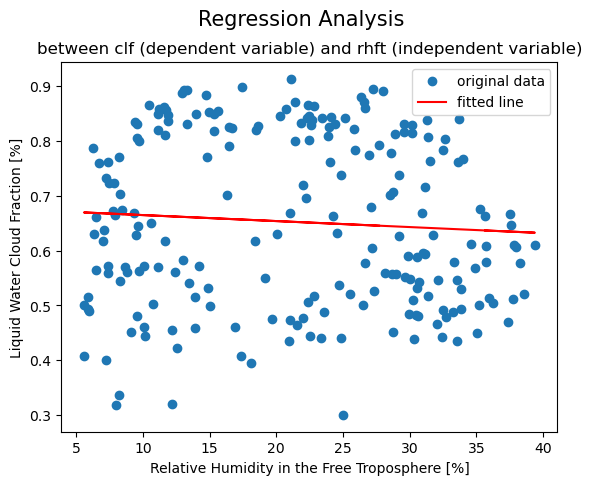

Regression coefficient/sensitivity clf ~ sst: -0.062366675187428285
Regression coefficient/sensitivity clf ~ eis: 0.05985522643244844
Regression coefficient/sensitivity clf ~ t_adv: -0.04663589903499677
Regression coefficient/sensitivity clf ~ w700: 0.3336366856461318
Regression coefficient/sensitivity clf ~ rhft: -0.0010928143348789582
Is the relationship clf ~ sst significant at the 95% level? True
Is the relationship clf ~ eis significant at the 95% level? True
Is the relationship clf ~ t_adv significant at the 95% level? True
Is the relationship clf ~ w700 significant at the 95% level? False
Is the relationship clf ~ rhft significant at the 95% level? False
Is the relationship clf ~ sst significant at the 99% level? True
Is the relationship clf ~ eis significant at the 99% level? True
Is the relationship clf ~ t_adv significant at the 99% level? False
Is the relationship clf ~ w700 significant at the 99% level? False
Is the relationship clf ~ rhft significant at the 99% level? Fals

In [3]:
# use this cell for your code, make sure to comment your code to make it understandable

# load additional packages 
from scipy.stats import pearsonr
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Task 1. regression analyis of CLF with each meteorological predictor 
## it is not asked for the a linear regressions of the means like in the exercises, so I did not compute them 

## computing the linear regressions 
### simple
slope_sst, intercept_sst, r_value_sst, p_value_sst, std_err_sst = scipy.stats.linregress(data_df.sst, data_df.clf)
slope_eis, intercept_eis, r_value_eis, p_value_eis, std_err_eis = scipy.stats.linregress(data_df.eis, data_df.clf)
slope_t_adv, intercept_t_adv, r_value_t_adv, p_value_t_adv, std_err_t_adv = scipy.stats.linregress(data_df.t_adv, data_df.clf)
slope_w700, intercept_w700, r_value_w700, p_value_w700, std_err_w700 = scipy.stats.linregress(data_df.w700, data_df.clf)
slope_rhft, intercept_rhft, r_value_rhft, p_value_rhft, std_err_rhft = scipy.stats.linregress(data_df.rhft, data_df.clf)

## plotting the linear regressions to gain an overview 
plt.plot(data_df.sst, data_df.clf, 'o', label='original data') # plot data 
plt.plot(data_df.sst, intercept_sst + slope_sst*data_df.sst, 'r', label='fitted line') # add regression line
plt.title('between clf (dependent variable) and sst (independent variable)',fontsize = 12) # add subtitle 
plt.suptitle('Regression Analysis', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Sea Surface Temperature [K]") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
plt.legend() # add legend 
plt.show() 

plt.plot(data_df.eis, data_df.clf, 'o', label='original data') # plot data 
plt.plot(data_df.eis, intercept_eis + slope_eis*data_df.eis, 'r', label='fitted line') # add regression line
plt.title('between clf (dependent variable) and eis (independent variable)',fontsize = 12) # add subtitle 
plt.suptitle('Regression Analysis', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Estimated Inversion Strength [K/km]") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
plt.legend() # add legend 
plt.show() 

plt.plot(data_df.t_adv, data_df.clf, 'o', label='original data') # plot data 
plt.plot(data_df.t_adv, intercept_t_adv + slope_t_adv*data_df.t_adv, 'r', label='fitted line') # add regression line
plt.title('between clf (dependent variable) and t_adv (independent variable)',fontsize = 12) # add subtitle 
plt.suptitle('Regression Analysis', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Temperature Advection [°F/h]") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
plt.legend() # add legend 
plt.show() 

plt.plot(data_df.w700, data_df.clf, 'o', label='original data') # plot data 
plt.plot(data_df.w700, intercept_w700 + slope_w700*data_df.w700, 'r', label='fitted line') # add regression line
plt.title('between clf (dependent variable) and w700 (independent variable)',fontsize = 12) # add subtitle 
plt.suptitle('Regression Analysis', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Vertical Pressure Velocity [Pa/s]") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
plt.legend() # add legend 
plt.show() 

plt.plot(data_df.rhft, data_df.clf, 'o', label='original data') # plot data 
plt.plot(data_df.rhft, intercept_rhft + slope_rhft*data_df.rhft, 'r', label='fitted line') # add regression line
plt.title('between clf (dependent variable) and rhft (independent variable)',fontsize = 12) # add subtitle 
plt.suptitle('Regression Analysis', fontsize = 15 , y = 0.99) # add title (they can take different font size arguments) 
plt.xlabel("Relative Humidity in the Free Troposphere [%]") # add x axis label
plt.ylabel("Liquid Water Cloud Fraction [%]") # add y axis label
plt.legend() # add legend 
plt.show() 



# Task 2. Describe the sensitivities of CLF to the meteorological predictors:

## simple regressions 

### How sensitive are low clouds to changes in meteorological predictors (in individual simple regression models, 
### and in a multiple regression framework)?

### "The slope of the regression line is also called "regression coefficient" and can be understood as a sensitivity 
### of y to a change in X." (copied from script)
print("Regression coefficient/sensitivity clf ~ sst:", slope_sst)
print("Regression coefficient/sensitivity clf ~ eis:", slope_eis)
print("Regression coefficient/sensitivity clf ~ t_adv:", slope_t_adv)
print("Regression coefficient/sensitivity clf ~ w700:", slope_w700)
print("Regression coefficient/sensitivity clf ~ rhft:", slope_rhft)

### Are the relationships significant?
#### significance at 95% level
print("Is the relationship clf ~ sst significant at the 95% level?", p_value_sst < 0.05)
print("Is the relationship clf ~ eis significant at the 95% level?", p_value_eis < 0.05)
print("Is the relationship clf ~ t_adv significant at the 95% level?", p_value_t_adv < 0.05)
print("Is the relationship clf ~ w700 significant at the 95% level?", p_value_w700 < 0.05)
print("Is the relationship clf ~ rhft significant at the 95% level?", p_value_rhft < 0.05)

#### significance at 99% level
print("Is the relationship clf ~ sst significant at the 99% level?", p_value_sst < 0.01)
print("Is the relationship clf ~ eis significant at the 99% level?", p_value_eis < 0.01)
print("Is the relationship clf ~ t_adv significant at the 99% level?", p_value_t_adv < 0.01)
print("Is the relationship clf ~ w700 significant at the 99% level?", p_value_w700 < 0.01)
print("Is the relationship clf ~ rhft significant at the 99% level?", p_value_rhft < 0.01)



## multivariate regression
### first option using LinearRegrssion from sklearn.linear_model 
multi_regr1 = LinearRegression() # create linear regression object
multi_regr1.fit(X_standardized, y) # fills the regression object with the data

coef_sst = multi_regr1.coef_[0] # get the coefficients 
coef_eis = multi_regr1.coef_[1]
coef_t_adv = multi_regr1.coef_[2]
coef_w700 = multi_regr1.coef_[3]
coef_rhft = multi_regr1.coef_[4]

print("Multiple regression coefficient/sensitivity sst:", coef_sst)
print("Multiple regression coefficient/sensitivity eis:", coef_eis)
print("Multiple regression coefficient/sensitivity t_adv:", coef_t_adv)
print("Multiple regression coefficient/sensitivity w700:", coef_w700)
print("Multiple regression coefficient/sensitivity rhft:", coef_rhft)


### second option using statsmodels
X_standardized_with_intercept = sm.add_constant(X_standardized) # add intercept 
multi_regr2 = sm.OLS(y, X_standardized_with_intercept) # create regression object 
multi_regr2_results = multi_regr2.fit() # fit the model 
multi_regr2_summary = multi_regr2_results.summary() # obtain the summary 
print(multi_regr2_summary) # print the model 



## Are there strong correlations between the different predictors that could influence the sensitivity estimates?
### to look into the correlations between the different predictors, I computed the different Pearson correlation coefficients
r_sst_eis, p_sst_eis = pearsonr(data_df.sst, data_df.eis)
r_sst_t_adv, p_sst_t_adv = pearsonr(data_df.sst, data_df.t_adv)
r_sst_w700, p_sst_w700 = pearsonr(data_df.sst, data_df.w700)
r_sst_rhft, p_sst_rhft = pearsonr(data_df.sst, data_df.rhft)
r_eis_t_adv, p_eis_t_adv = pearsonr(data_df.eis, data_df.t_adv)
r_eis_w700, p_eis_w700 = pearsonr(data_df.eis, data_df.w700)
r_eis_rhft, p_eis_rhft = pearsonr(data_df.eis, data_df.rhft)
r_t_adv_w700, p_t_adv_w700 = pearsonr(data_df.t_adv, data_df.w700)
r_t_adv_rhft, p_t_adv_rhft = pearsonr(data_df.t_adv, data_df.rhft)
r_w700_rhft, p_w700_rhft = pearsonr(data_df.w700, data_df.rhft)

print("Pearson correlation coefficient sst and eis: ", r_sst_eis, "\n Significant at the 95% level : ", p_sst_eis < 0.05)
print("Pearson correlation coefficient sst and t_adv: ", r_sst_t_adv, "\n Significant at the 95% level : ", p_sst_t_adv < 0.05)
print("Pearson correlation coefficient sst and w700: ", r_sst_w700, "\n Significant at the 95% level : ", p_sst_w700 < 0.05)
print("Pearson correlation coefficient sst and rhft: ", r_sst_rhft, "\n Significant at the 95% level : ", p_sst_rhft < 0.05)
print("Pearson correlation coefficient eis and t_adv: ", r_eis_t_adv, "\n Significant at the 95% level : ", p_eis_t_adv < 0.05)
print("Pearson correlation coefficient eis and w700: ", r_eis_w700, "\n Significant at the 95% level : ", p_eis_w700 < 0.05)
print("Pearson correlation coefficient eis and rhft: ", r_eis_rhft, "\n Significant at the 95% level : ", p_eis_rhft < 0.05)
print("Pearson correlation coefficient t_adv and w700: ", r_t_adv_w700, "\n Significant at the 95% level : ", p_t_adv_w700 < 0.05)
print("Pearson correlation coefficient t_adv and rhft: ", r_t_adv_rhft, "\n Significant at the 95% level : ", p_t_adv_rhft < 0.05)
print("Pearson correlation coefficient w700 and rhft: ", r_w700_rhft, "\n Significant at the 95% level : ", p_w700_rhft < 0.05)

**Describe the results here**

*I wasn't able to find the documentation of the units for the variables, so I am not 100 % that the units that I used in the scatterplots are correct.* 

2. Describe the sensitivities of CLF to the meteorological predictors:

    2.1 How sensitive are low clouds to changes in meteorological predcitors. 

    - in individual simple regression models? 
        * Sensitivity clf ~ sst: -0.062: For every unit increase in sea surface temperature (sst), the low cloud fraction 
          (clf) decreases by approximately 0.062 units. The coefficient is negative and therefore suggests an inverse 
          relationship between the two parameters - higher temperatures tend to be associated with lower cloud fractions. 
        * Sensitivity clf ~ eis: 0.060: For every unit increase in the estimated inversion strength (eis), the clf 
          increases by approximately 0.060 units. The coefficient indicates a direct relationship between eis and clf - 
          stronger inversions are associated with higher cloud fractions. 
        * Sensitivity clf ~ t_adv: -0.047: For every unit increase in the temperature advection (t_adv), the clf decreases 
          by approximately 0.047 units. The relationship is inverse - higher temperature advections are associated with 
          lower cloud fractions. 
        * Sensitivity clf ~ w700: 0.334: For every unit increase in the 700 hPa vertical velocity (w700), the low   
           cloudfraction increases by approximately 0.334 units. The relationship is positive - higher vertical pressure 
           velocity are associated with higher cloud fractions. 
        * Sensitivity clf ~ rhft: -0.001: For every unit increase in the relative humidity in the free troposphere (rhft), 
          the clf decreases by approximately 0.001 units. The coefficient is close to zero suggesting a very weak or no 
          relationship between the two parameters. The relationship is slightly negative. 
        * The magnitude of the regression coefficient is the highest for w700, followed by sst and eis, and the lowest for 
          rhft. 
        * In the plots, the linear relationship between clf and sst and clf and eis are the most pronounced, by far more 
          than the relationship between clf and the other meteorlogical predictors. But the regression coefficient between 
          clf and w700 is the highest. This can be due to the fact that the predictors are not on the same scale, as 
          explained in the task. Therefore, the sensitivity estimates of the individual simple regression models are not 
          comparable and have to be looked at separate from each other. Additional, there could be correlations between the 
          different predictors that could influence the sensitivity estimates (i.e. Task 2.3)
        
    - in a multiple regression framework? 
        * Sensitivity clf ~ sst: -0.084. In this framework, the sensitivity from clf to changes in sst is  
          higher than in the simple regression model. The relationship is negative again. 
        * Sensitivity clf ~ eis: 0.062. The sensivity from clf is also higher to changes in eis, but the increase of the 
          coefficient compared to the one of the simple regression model is smaller than for sst. The relationship is 
          positive again. 
        * Sensitivity clf ~ t_adv: -0.013. The sensitivty from clf to t_adv is smaller in the multiple regression compared
          to the simple regression model. The relationship is negative again. 
        * Sensitivity clf ~ w700: 0.006: Again, the sensitivity from clf to changes in w700 is smaller than in the simple 
          regression model. The difference between the two sensitivties of this parameters is the highest compared to the 
          others. 
        * Sensitivity clf ~ rhft: 0.033. This time, the sensitivity from clf to changes in rhft increased compared to the 
          simple regression model. This coefficient indicates a small, positive relationship between clf and rhft. 
        * Based on the coefficients of the multiple regression model, sst and eis appear to be the most important 
          predictors for clf. This aligns with the plots of the simple regression models.     
    
    
    2.2  Are the relationships significant?
    - in the individual simple regression models? 
        * The relationship clf ~ sst is significant at the 95 % and at the 99 % level
        * The relationship clf ~ eis is significant at the 95 % and at the 99 % level
        * The relationship clf ~ t_adv is significant at the 95 %, but not at the 99 % level
        * The relationship clf ~ w700 is not significant at the 95 % and at the 99 % level
        * The relationship clf ~ rhft is not significant at the 95 % and at the 99 % level
   
     - in a multiple regression framework?
        * The relationship clf ~ sst is significant at the 95 % and at the 99 % level
        * The relationship clf ~ eis is significant at the 95 % and at the 99 % level
        * The relationship clf ~ t_adv is significant at the 95 %, but not at the 99 % level
        * The relationship clf ~ w700 is not significant at the 95 % and at the 99 % level
        * The relationship clf ~ rhft is significant at the 95 % and at the 99 % level
   

    2.3 Are there strong correlations between the different predictors that could influence the sensitivity estimates?
    - The results show strong correlations between some predictors that could influence the sensitivity estimates. The 
      following predictors show the highest correlations: 
        * There is a very strong negative correlation between sst and eis with a coefficient of approximately -0.95. The
          correlation is significant at the 95% level.
        * There is a negative correlation between t_adv and w700 with a coefficient of approximately -0.51 %. The 
          correlation is significant at the 95 & level. 
        * There is a negative correlation between w700 and rhft with a coefficient of approximately -0.59 %. The 
          correlation is significant at the 95 % level.
        * There is a positive correlation between t_adv and rhft with a coefficient of approximately 0.65 %. The 
          correlation is significant at the 95 % level. 
      
To sum it up, sst and eis appear to be the most important predictors for clf based on the multiple regression and the plot from the simple regression model. The relationships between clf and eis and clf and sst are significant on the 99 % level. Eis and sst have a strong negative correlation, which could influence the sensitivity estimates. 

__Task__:
Use a machine learning model to 
1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to visualize model performance and check for overfitting. Do the same for a multiple linear regression model, is the machine learning model better than the multiple regression?
3. Which predictors are most important for the model to predict CLF? [feature importance]
3. Analyze the two most important meteorological features in more detail: How do they influence the prediction of CLF? [partial dependency, SHAP] 

Fitting 5 folds for each of 70 candidates, totalling 350 fits
GBRT mean squared error: 0.00
GBRT coefficient of determination: 0.84
GBRT coefficient of determination with the built-in method "score": 0.84
MLR mean squared error: 0.00
MLR coefficient of determination: 0.80


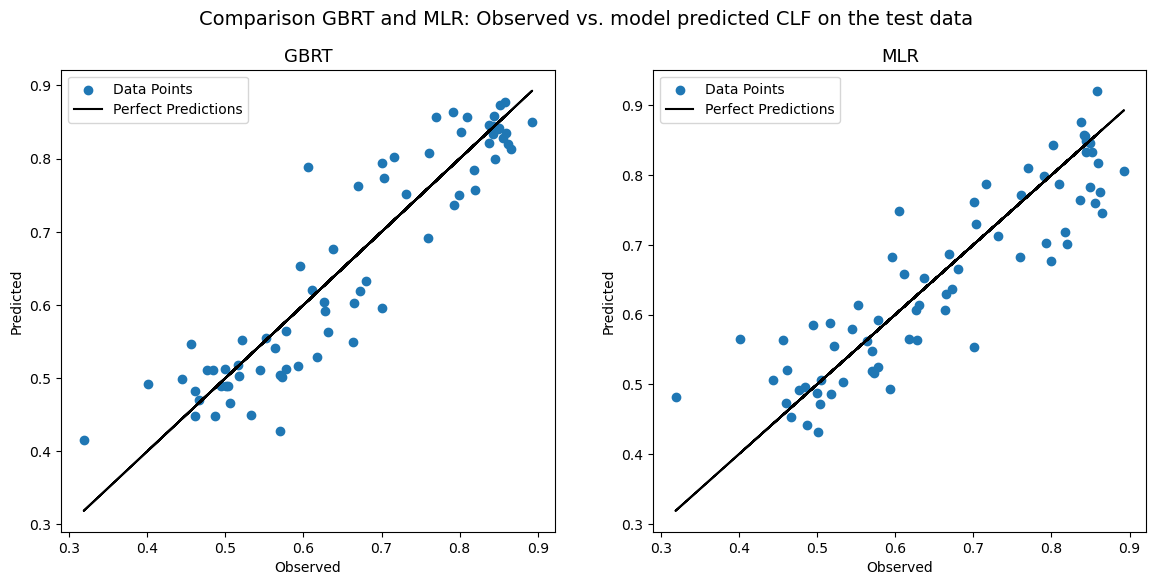

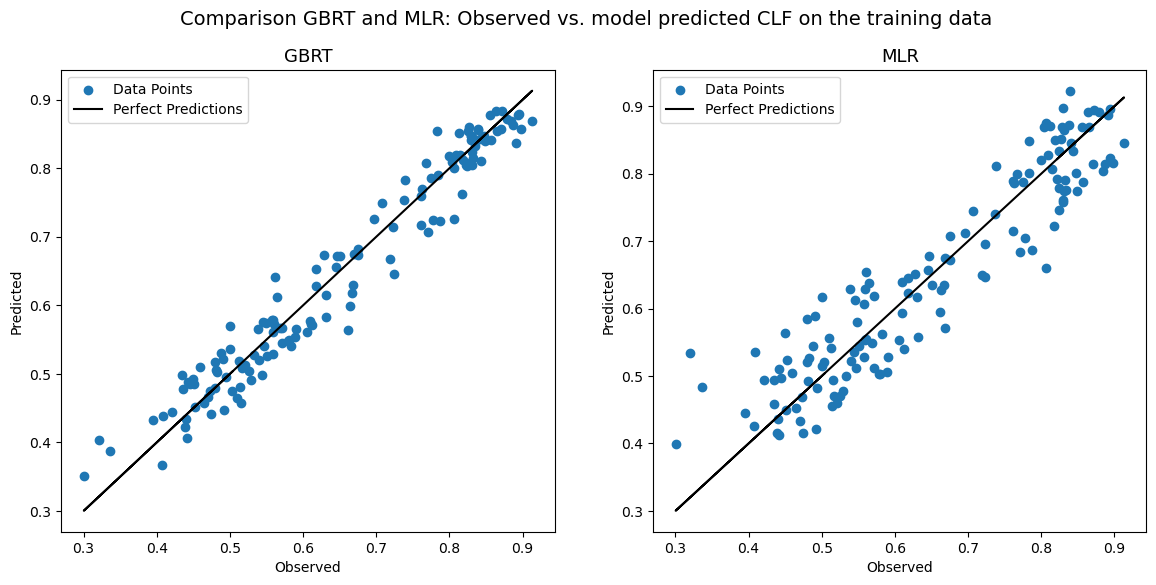

Impurity-based feature importance: [0.30621995 0.29539322 0.11382646 0.0990046  0.18555577]
Permutation feature importance: [0.40660522 0.48552811 0.02428632 0.01143237 0.11178147]


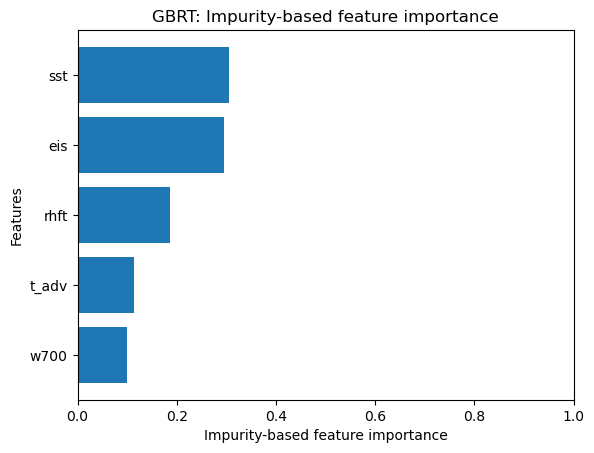

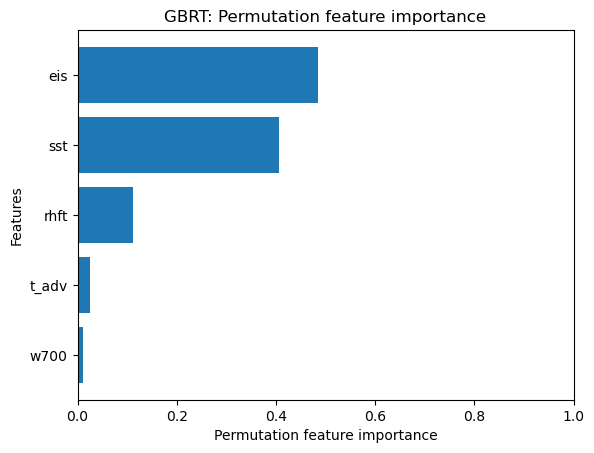

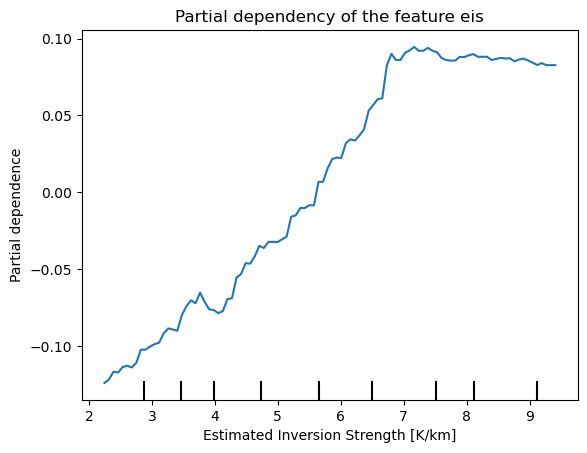

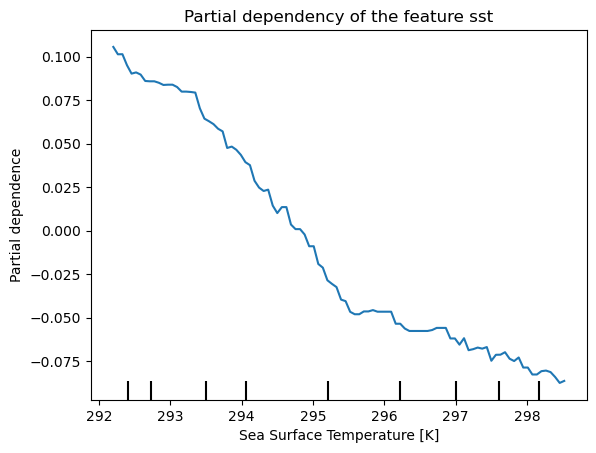

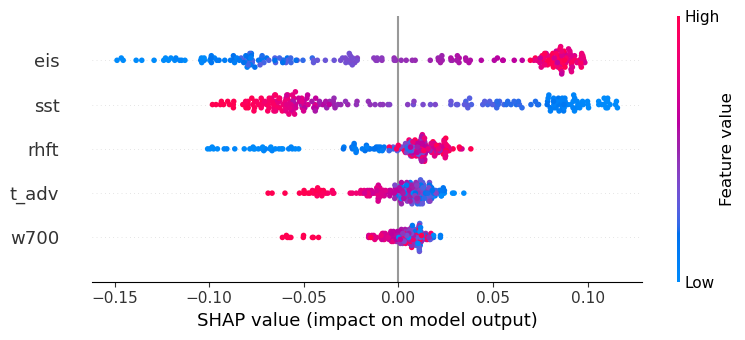

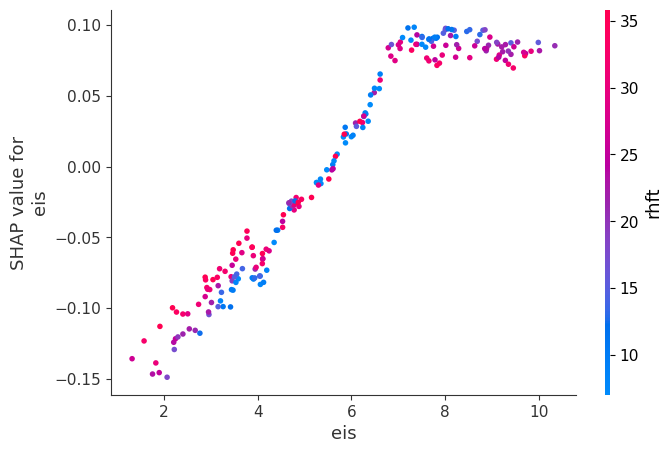

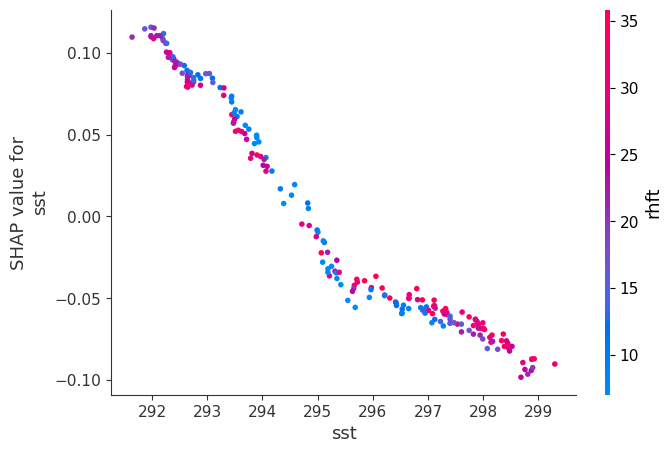

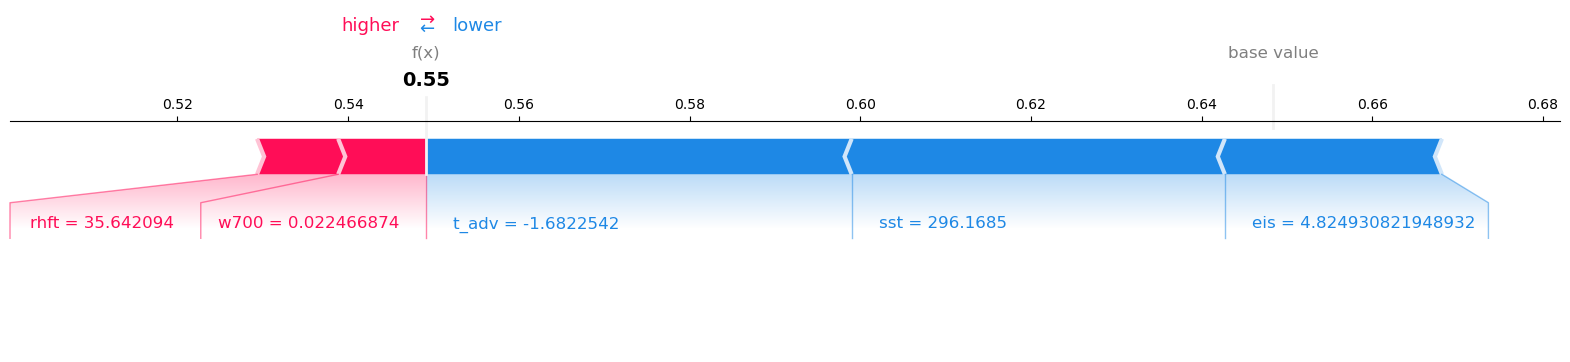

In [5]:
# use this cell for your code, make sure to comment your code to make it understandable
# some code to help you get started:
X = data_df.drop(['clf'],axis=1)
y = data_df.drop(['sst','eis','w700','rhft','t_adv'],axis=1)

# load packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap



# Task 1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), 
#         tuning of hyperparameters]

## split data into seperate training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)


## converting y_train & y_test to a 1D array since the GradientBoostingRegressor expects the target variable y_train to be a 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


## Machine learning model (choosen model: Gradient Boosting Regression Tree, hyperparameter tuning using random search)
n_iter = 70 # number of random iterations. 100 iterations caused an overflow error, therefore I choose only 70 iterations
random_params = {'learning_rate': np.random.uniform(0,1,size = n_iter), # define the way values for the RandomizedSearchCV are drawn for each specific hypterparamter
        'max_depth': np.random.randint(3, 10, n_iter),
        'n_estimators': np.random.randint(100, 500, n_iter),
        'subsample':np.random.uniform(0,1,size = n_iter),
        'min_samples_split': np.random.randint(3, 30, n_iter)
         }

gbrt_model = GradientBoostingRegressor() # assign the function to a variable name 
gbrt_model.fit(X_train, y_train) 

searchcv = RandomizedSearchCV(gbrt_model, random_params, n_iter = n_iter, n_jobs = -1, verbose = 1, cv = 5, random_state = 1) # assign the function to a variable name 
searchcv.fit(X_train, y_train) # train the model 
best_gbrt_model = searchcv.best_estimator_ # extract the best model 


### evaluating the model using the test data 
y_test_gbrt = best_gbrt_model.predict(X_test) # using the optimized GBRT model
print('GBRT mean squared error: %.2f' % mean_squared_error(y_test, y_test_gbrt)) # get MSE
print('GBRT coefficient of determination: %.2f' % r2_score(y_test, y_test_gbrt)) # get R^2
print('GBRT coefficient of determination with the built-in method "score": %.2f' % best_gbrt_model.score(X_test, y_test))



# Task 2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to 
#         visualize model performance and check for overfitting. Do the same for a multiple linear regression model, 
#         is the machine learning model better than the multiple regression?

## multiple linear regression model 
### train the model 
linear_model = LinearRegression() # create linear regression object
linear_model.fit(X_train, y_train) # fills the regression object with the data. 

### evaluate the model 
y_test_linear = linear_model.predict(X_test)
print('MLR mean squared error: %.2f' % mean_squared_error(y_test, y_test_linear))
print('MLR coefficient of determination: %.2f' % r2_score(y_test, y_test_linear))


## scatter plot
### for the test data set
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # create figure containing two subplots 

plt.subplot(1, 2, 1) # create first subplot
plt.scatter(y_test, y_test_gbrt, label = "Data Points")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("GBRT", fontsize = 13)
plt.plot(y_test, y_test, color = 'k', label = "Perfect Predictions")
plt.legend() 

plt.subplot(1, 2, 2) #create second subplot
plt.scatter(y_test, y_test_linear, label = 'Data Points')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("MLR", fontsize = 13)
plt.plot(y_test, y_test, color = 'k', label = 'Perfect Predictions')
plt.legend()

fig.suptitle("Comparison GBRT and MLR: Observed vs. model predicted CLF on the test data", fontsize = 14) # add title for whole figure 
plt.show()


### for the training data set 
y_train_gbrt = best_gbrt_model.predict(X_train) # geting the models predicted CLF for the training data set 
y_train_linear = linear_model.predict(X_train) 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # create figure containing two subplots 

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_gbrt, label = "Data Points") 
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("GBRT", fontsize = 13)
plt.plot(y_train, y_train, color = 'k', label = "Perfect Predictions")
plt.legend() 

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_linear, label='Data Points')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("MLR", fontsize = 13)
plt.plot(y_train, y_train, color = 'k', label = 'Perfect Predictions')
plt.legend()

fig.suptitle("Comparison GBRT and MLR: Observed vs. model predicted CLF on the training data", fontsize = 14) # add title for whole figure 
plt.show()



# Task 3. Which predictors are most important for the model to predict CLF? [feature importance]
print("Impurity-based feature importance:", best_gbrt_model.feature_importances_)

pi = permutation_importance(best_gbrt_model, X_test, y_test, random_state=0)
print("Permutation feature importance:", pi.importances_mean)

# create a DataFrame with the feature importance values and feature names for plotting
fi_df = pd.concat([
    pd.DataFrame(X.columns, columns=["name"]),
    pd.DataFrame(best_gbrt_model.feature_importances_, columns=["values"])
    ], axis=1)

pi_df = pd.concat([
    pd.DataFrame(X.columns, columns=["name"]),
    pd.DataFrame(pi.importances_mean, columns=["values"])
    ], axis=1)

# A barplot is used to better visualize the feature importance
plt.barh(width = fi_df.sort_values("values")["values"], y = fi_df.sort_values("values")["name"])
plt.xlabel("Impurity-based feature importance")
plt.ylabel("Features")
plt.title("GBRT: Impurity-based feature importance")
plt.xlim(0, 1)
plt.show()

plt.barh(width = pi_df.sort_values("values")["values"], y = pi_df.sort_values("values")["name"])
plt.xlabel("Permutation feature importance")
plt.ylabel("Features")
plt.title("GBRT: Permutation feature importance")
plt.xlim(0, 1)
plt.show()



# Task 4. Analyze the two most important meteorological features in more detail: 
#         How do they influence the prediction of CLF? [partial dependency, SHAP]
## partial dependency 
PartialDependenceDisplay.from_estimator(best_gbrt_model, X, features=["eis"], kind="average", n_jobs=-1,random_state=0) # for eis
plt.title("Partial dependency of the feature eis")
plt.xlabel("Estimated Inversion Strength [K/km]") 
plt.show()

PartialDependenceDisplay.from_estimator(best_gbrt_model, X, features=["sst"], kind="average", n_jobs=-1,random_state=0) # for sst 
plt.title("Partial dependency of the feature sst")
plt.xlabel("Sea Surface Temperature [K]") 
plt.show()

## SHAP
### calculate shap values 
explainer = shap.TreeExplainer(best_gbrt_model) # use the fitted model as input
shap_values = explainer.shap_values(X) # use the named X DataFrame

shap.summary_plot(shap_values, X) # get the summary plot 

shap.dependence_plot("eis", shap_values, X) # plot the depence plot for the eis variable 
shap.dependence_plot("sst", shap_values, X) # # plot the depence plot for the sst variable 

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0],matplotlib=True) # create force plot for the first data point


**Describe the results here and compare your findings with Klein et al. (2017), specifically Table 1 of that paper.**


*The exact results differ each time I run this code. Therefore, the results described here may vary from the results this script produces when you run it. I assumed this is happening because the test and training data sets get created each time this script runs. My research showed that setting a fixed random seed in train_test_split will fix this issue. However, used "random_state = 1" in my code. I then added the same argument in the RandomizedSearchCV function, but this also did not lead to the same results. Since the results do not differ that much from eachother and show the same in priniciple, I don't think this is a big problem.* 



1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
    - I predicted CLF using the Gradient Boosting Regression tree and hyperparameter tuning using random search. The MSE 
      amounts to 0.00 and R² amounts to 0.84. 84 % of the variance in CLF is explained by the model. 

 <br> 
 
2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to visualize model performance and check for overfitting. Do the same for a multiple linear regression model, is the machine learning model better than the multiple regression?
    - Multiple lineare regression (MLR) mean squared error: 0.00, MLR R²: 0.80. The MSE of both models is 0.00, but the R² 
      for the machine learning model is 4 % higher than for the multiple regression model. This indicates that the machine 
      learning model is performing a little bit better than the multiple regression model 
    - The scatterplots for the test data look very similar for both models. The points are scattered relatively close 
      around the diagonal line, but are far from being directly on the line. It seems like the points are a bit more 
      scattered in the MLR plot. The plots indicates some prediction errors, but overall, the models capture the underlying 
      relationship between the features and clf while the MLR model has slightly more variablitiy in its predictions. 
    - The scatterplots for the training data show a different pattern for the GBRT: The points lie perfectly on the 
      diagonal line. This is a sign of overfitting. The scatterplot for the MLR looks similar to the test data scatter 
      plot. The points are scattered around the line.   

 <br> 
 
3. Which predictors are most important for the model to predict CLF? [feature importance]
    - The results for the feature importance are: 
        - impurity-based feature importance: 
            * eis (0.86055147), sst (0.04531822),  rhft (0.04292723), t_adv (0.02716726), w700 (0.02403581),
        - permutation feature importance:
            * eis (1.30008183), sst (0.16834465), rhft (0.07001663), w700 (0.00694987), t_adv (-0.00179336) 
    - For both methods, eis is by far the most important predictor, followed by sst. The impurity-based feature importance 
      for sst, rhft, w700 and t_adv are a lot smaller than for eis and the difference between the four least important 
      feature is not big. Regarding the permutation feature importance, the difference between sst and the less important 
      features is a little bit bigger. Since the permutation feature importance is thought to be more accurate, I would use 
      this method to assess the feature importance of the predictors. I used both options here to practise and to see in 
      what way the results differ. 
 
 <br> 
  
4. Analyze the two most important meteorological features in more detail: How do they influence the prediction of CLF? [partial dependency, SHAP] 
    - partial dependency:
        * eis: when the estimated inversion strength increases, the partial dependence also increases. Stronger inversions 
          are associated with higher clf 
        * sst: when the sea surface temperature increases, the partial dependence decreases. Higher temperatures are 
          associated with lower clf
    
    - SHAP: 
        * In the summary plot, it is shown that high eis-values increase the clf. The gradually color gradient of the eis – 
          values show that overall, when its values decrease, clf decreases as well. Low sst-values, however, increase the 
          clf. The progression of the values of sst show that the relationship between sst values in the higher range and 
          clf is not that clear, the color gradient is not gradually. Higher sst values are usually associated with lower 
          clf, but the relationship is not linearly. The same patterns can be seen in the individual plots for eis and sst. 
        * In the depence plot for the sst variable, the interaction between eis and sst is also visible. Lower sst-values 
          are associated with higher eis-values and vice versa. This aligns with the result of the correlation analysis 
          between sst and eis, which indicated a strong negative correlation.   
  
  
In summary, both models have low MSE and capture the relationship between the features and clf. The models perform well, but the machine learning model (GBRT) outperforms the multiple linear regression model with a higher R². However, the scatterplot for test data indicates overfitting in the GBRT. It may not generalize well to unseen data. This concern does not show in the training data test plot, since the points are close to the diagonal line. Nevertheless, this should be addressed when working further. Additionally, the analysis revealed that the estimated inversion strength and the sea surface temperatur are the most important predictors for liquid water cloud fraction. This aligns with the results from the regression analysis, where the relationship between sst and clf as well as eis were the most pronounced.


**compare your findings with Klein et al. (2017), specifically Table 1 of that paper***  
My results align with Klein et al. (2017). My results show that the estimated inversion strength and the sea surface temperature are the most important meteorological features for prediction CLF.  Klein et. al. (2017) states that the relationship between increased low cloud to increased inversion strength is the most robust one of all cloud-controlling factors. The relation is due to the fact that "reduced mixing across inversion keeps boundary layer shallower, more humid and more cloudy" (Klein et. al., 2017). The study also states that sea surface temperature is an important cloud controlling factor, because "colder temperature reduces the efficiency of entrainment necessitating more cloud to produce
a given entrainment rate" (Klein et. al., 2017). The research further states that tropical low-cloud feedback is positive, mainly because the reflection of solar radiation of low clouds decreases when temperatures increases. However, the increase in inversion strength partially offsets this effect, other cloud controlling factors would be playing a smaller role. This indicates that temperature and inversion strength are the most important cloud-controlling factors, which aligns with my findings that EIS and SST are the most important predictors of CLF. Other cloud-controlling factors mentioned in the study are reduced subsidence, increased horizontal cold advection, increased free-tropospheric humidity, decreased downward longwave radiation and increased surface wind speed. The variables that I analyzed show the same relationships: 
  
  - increased temperature advection lead to increased CLF
  - higher windspeed lead to lower CLF
  - lower humidity leads to lower CLF
 
 However, my results state that these factors are less important in predicting CLF than EIS and SST. 


## Part two: Classification in a remote sensing retrieval setting

__Task__
1. Divide data into test and training data sets
2. Train and optimize (hyperparameter tuning) a machine learning model 
3. Train a logistic regression model
4. Analyze both classifiers with a confusion matrix and perfomance metrics

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[[1022  150]
 [ 191  680]]


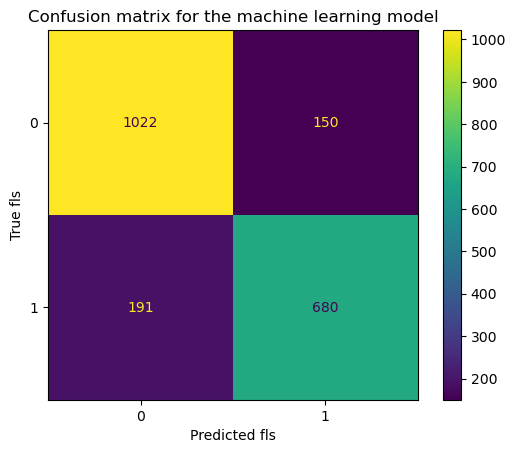

[[979 193]
 [415 456]]


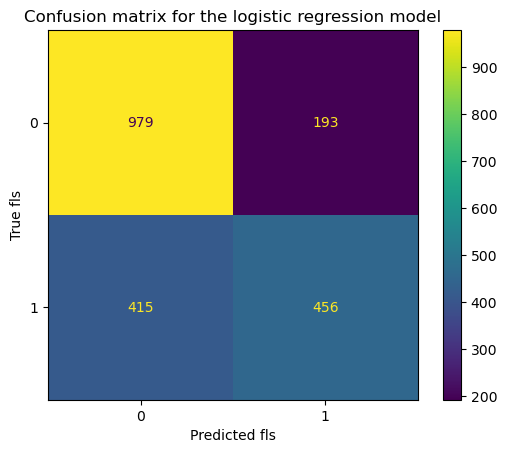

Machine learning model: Probability of detection:  0.781
Logistic regression model: Probability of detection:  0.524
Machine learning model: Overall accuracy:  0.833
Logistic regression model: Overall accuracy:  0.702
Machine learning model: False alarm rate:  0.181
Logistic regression model: False alarm rate:  0.297
Machine learning model: Bias score:  0.953
MLogistic regression model: Bias score:  0.745
Machine learning model: Specificity:  0.872
Logistic regression model: Specificity:  0.835
Machine learning model: Precision:  0.819
Logistic regression model: Precision:  0.703
Machine learning model: Negative predictive value:  0.843
Logistic regression model: Negative predictive value:  0.702
Machine learning model: False positive rate:  0.128
Logistic regression model: False positive rate:  0.165
Machine learning model: False negative rate:  0.219
Logistic regression model: False negative rate:  0.476


In [6]:
import xarray as xr

data = xr.open_dataset('data_final_task_classification.nc') # load the data set
X = data[['IR_016','IR_039','IR_087','IR_097','IR_108','IR_120','IR_134']] # define X to be the satellite observations from different channels
X['hour'] = data.time['time.hour'] # use the hour of the observation as an additional predictor
X = X.to_dataframe() # convert to a pandas data frame

y = data.station_fls # define y to be the True/False labels from the meteorological station

# continue your code here

# load packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier


# Task 1. Divide data into test and training data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



# Task 2. Train and optimize (hyperparameter tuning) a machine learning model.
n_iter = 70 # number of random iterations. 100 iterations caused an overflow error, therefore I choose only 70 iterations
random_params = {'learning_rate': np.random.uniform(0,1,size = n_iter), # define the way values for the RandomizedSearchCV are drawn for each specific hypterparamter
        'max_depth': np.random.randint(3, 10, n_iter),
        'n_estimators': np.random.randint(100, 500, n_iter),
        'subsample':np.random.uniform(0,1,size = n_iter),
        'min_samples_split': np.random.randint(3, 30, n_iter)
         }

gbc_model = GradientBoostingClassifier() # assign the function to a variable name 
gbc_model.fit(X_train, y_train) # train the model 

searchcv = RandomizedSearchCV(gbc_model, random_params, n_iter = n_iter, n_jobs = -1, verbose = 1, cv = 5) # assign the function to a variable name 
searchcv.fit(X_train, y_train) # train the model with hypterparameter tuning
best_gbc_model = searchcv.best_estimator_ # extract the best model 



# Task 3. Train a logistic regression model.
lg_model = LogisticRegression(random_state = 0, max_iter = 200) # assign the function to a variable name. I increased the number of iterations so that the algorithm converges  
lg_model.fit(X_train, y_train) # fit the model on the training data



# Task 4. Analyze both classifiers with a confusion matrix and performance metrics
## obtain and visualize confustion matrix
### for the machine learning model
y_pred_ML = best_gbc_model.predict(X_test) # make predictions on test data 
CM_ML = confusion_matrix(y_test, y_pred_ML) # calculate confusion matrix 
print(CM_ML) # print confusion matrix 


disp_CM_ML = ConfusionMatrixDisplay(CM_ML) # plot the confusion matrix using the function ConfusionMatrixDisplay
disp_CM_ML.plot()
plt.xlabel("Predicted fls") 
plt.ylabel("True fls")
plt.title("Confusion matrix for the machine learning model")
plt.show()

### for the logistic regression model 
y_pred_LR = lg_model.predict(X_test) # make predictions on test data 
CM_LR = confusion_matrix(y_test, y_pred_LR) # calculate confusion matrix
print(CM_LR) # print confusion matrix 

disp_CM_LR = ConfusionMatrixDisplay(CM_LR) # plot the confusion matrix using the function ConfusionMatrixDisplay
disp_CM_LR.plot()
plt.xlabel("Predicted fls") 
plt.ylabel("True fls") 
plt.title("Confusion matrix for the logistic regression model")
plt.show()


## calculate performance metrics 
## this is done by extraction information on the classification result from the confusion matrix and use it to compute the metrics 

### for the machine learning model 
#### extract information from the confusion matrix
TN_ML = CM_ML[0][0] # True negative
FN_ML = CM_ML[1][0] # False negative
TP_ML = CM_ML[1][1] # True positive
FP_ML = CM_ML[0][1] # False positive

#### calculate metrics
POD_ML = TP_ML / (TP_ML + FN_ML) # Probability of detection/sensitivity/hit rate/recall/true positive rate
ACC_ML = (TP_ML + TN_ML) / (TP_ML + FP_ML + FN_ML + TN_ML) # Overall accuracy/percent correct
FAR_ML = FP_ML / (TP_ML + FP_ML) # False alarm rate
BS_ML = (TP_ML + FP_ML) / (TP_ML + FN_ML) # Bias score
TNR_ML = TN_ML / (TN_ML + FP_ML) # Specificity or true negative rate
PPV_ML = TP_ML / (TP_ML + FP_ML) # Precision or positive predictive value
NPV_ML = TN_ML / (TN_ML + FN_ML) # Negative predictive value
FPR_ML = FP_ML / (FP_ML + TN_ML) # Fall out or false positive rate
FNR_ML = FN_ML / (TP_ML + FN_ML) # False negative rate


### for the logistic regression model 
#### extract information from the confusion matrix
TN_LR = CM_LR[0][0] # True negative
FN_LR = CM_LR[1][0] # False negative
TP_LR = CM_LR[1][1] # True positive
FP_LR = CM_LR[0][1] # False positive

#### calculate metrics
POD_LR = TP_LR / (TP_LR + FN_LR) # Probability of detection/sensitivity/hit rate/recall/true positive rate
ACC_LR = (TP_LR + TN_LR) / (TP_LR + FP_LR + FN_LR + TN_LR) # Overall accuracy/percent correct
FAR_LR = FP_LR / (TP_LR + FP_LR) # False alarm rate
BS_LR = (TP_LR + FP_LR) / (TP_LR + FN_LR) # Bias score
TNR_LR = TN_LR / (TN_LR + FP_LR) # Specificity or true negative rate
PPV_LR = TP_LR / (TP_LR + FP_LR) # Precision or positive predictive value
NPV_LR = TN_LR / (TN_LR + FN_LR) # Negative predictive value
FPR_LR = FP_LR / (FP_LR + TN_LR) # Fall out or false positive rate
FNR_LR = FN_LR / (TP_LR + FN_LR) # False negative rate


## print the performance metrics 
print("Machine learning model: Probability of detection: ", round(POD_ML,3))
print("Logistic regression model: Probability of detection: ", round(POD_LR,3))

print("Machine learning model: Overall accuracy: ", round(ACC_ML,3))
print("Logistic regression model: Overall accuracy: ", round(ACC_LR,3))

print("Machine learning model: False alarm rate: ", round(FAR_ML,3))
print("Logistic regression model: False alarm rate: ", round(FAR_LR,3))

print("Machine learning model: Bias score: ", round(BS_ML,3))
print("MLogistic regression model: Bias score: ", round(BS_LR,3))

print("Machine learning model: Specificity: ", round(TNR_ML,3))
print("Logistic regression model: Specificity: ", round(TNR_LR,3))

print("Machine learning model: Precision: ", round(PPV_ML,3))
print("Logistic regression model: Precision: ", round(PPV_LR,3))

print("Machine learning model: Negative predictive value: ", round(NPV_ML,3))
print("Logistic regression model: Negative predictive value: ", round(NPV_LR,3))

print("Machine learning model: False positive rate: ", round(FPR_ML,3))
print("Logistic regression model: False positive rate: ", round(FPR_LR,3))

print("Machine learning model: False negative rate: ", round(FNR_ML,3))
print("Logistic regression model: False negative rate: ", round(FNR_LR,3))


**Use this cell to descibe and compare the classification results of the machine learning and logistic regression approaches.** 

1. Probability of Detection (POD):
    - Machine Learning Model: 0.773
    - Logistic Regression Model: 0.524
    - The machine learning model outperforms the logistic regression model in correctly identifying positive cases (fls).
 
 <br>      
 
2. Overall Accuracy:
    - Machine Learning Model: 0.837
    - Logistic Regression Model: 0.702
    - The machine learning model achieves higher overall accuracy, indicating better performance in classifying positive 
      and negative cases.
 
 <br> 
 
3. False Alarm Rate:
    - Machine Learning Model: 0.168
    - Logistic Regression Model: 0.297
    - Tthe false alarm rate is lower for the machine learning model, indicating fewer false positives.
 
 <br> 
 
4. Bias Score:
    - Machine Learning Model: 0.929
    - Logistic Regression Model: 0.745
    - The bias score is higher for the machine learning model, indicating a better balance between sensitivity and 
      specificity.
 
 <br> 
 
5. Specificity (True Negative Rate):
    - Machine Learning Model: 0.884
    - Logistic Regression Model: 0.835
    - Both models depict a high specificity, but the machine learning model performs slightly better.
 
 <br> 
 
6. Precision (Positive Predictive Value):
    - Machine Learning Model: 0.832
    - Logistic Regression Model: 0.703
    - The machine learning model achieves higher precision, indicating a lower rate of false positives among the predicted 
      positive cases.
 
 <br> 
 
7. Negative Predictive Value:
    - Machine Learning Model: 0.840
    - Logistic Regression Model: 0.702
    - The machine learning model has a higher negative predictive value, indicating better performance in 
      correctly identifying negative cases.
 
 <br> 
 
8. False Positive Rate:
    - Machine Learning Model: 0.116
    - Logistic Regression Model: 0.165
    - The false positive rate is lower for the machine learning model, indicating fewer false positives among the 
      predicted negative cases.
 
 <br> 
 
9. False Negative Rate:
    - Machine Learning Model: 0.227
    - Logistic Regression Model: 0.476
    - The false negative rate is lower for the machine learning model, indicating fewer false negatives among the 
      predicted positive cases.
      
      
Overall, the machine learning model (Gradient Boosting Classifier) outperforms the logistic regression model considering various performance metrics. 

**Use this cell to compare your results to the results in Andersen et al. (2018)**


1. Probability of Detection (POD):
    - My MLM has a POD of 77%. The algorithm developed by Andersen et al. (2018) has with 94 % a notable higher POD.
 
 <br> 
 
2. Overall Accuracy:
    - My MLM has an accuracy of 84 %. Andersen's apporach has an overall correctness of 97 %, which is significantly 
      better. 
 
 <br> 
 
3. False Alarm Rate (FAR):
    - My MLM has a false alarm rate of 17 %, whereas the model by Andersen et al. (2018) has a lower false alarm rate of 12 
      %. 


The detection approach developed by Andersen et. al. (2018) achieved a significantly higher probability of detection and overall accuracy and a lower false alarm rate. The algorithm outperforms my machine learning model. 